In [70]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
NGN_GDP = pd.read_csv("RealGDP12052023.csv")

In [3]:
NGN_GDP.head()

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,QuarryingAndOtherMinerals,Manufacturing,OilRefining,Cement,FoodBeverageAndTobacco,TextileApparelAndFootwear,WoodAndWoodProducts,PulpPaperAndPaperProducts,ChemicalAndPharmaceuticalProducts,NonMetallicProducts,PlasticAndRubberProducts,ElectricalAndElectronics,BasicMetalIronAndSteel,MotorVehiclesAndAssembly,OtherManufacturing,ElectricityGasSteamAndAirCon,WaterSupplySewageWaste,Construction,Services,Trade,AccommodationAndFoodServices,TransportationAndStorage,RoadTransport,RailTransportAndPipelines,WaterTransport,AirTransport,TransportServices,PostAndCourierServices,InformationAndCommunication,Publishing,MotionPicturesSoundRecordingAndMusicProduction,Broadcasting,ArtsEntertainmentAndRecreation,FinanceAndInsurance,FinancialInstitutions,Insurance,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
1981,Annual,2364.37,1854.76,341.41,77.90,90.30,11753.40,5044.55,4977.42,21.33,7.86,37.95,5838.89,36.58,190.94,3278.24,1746.10,53.32,22.67,43.62,57.14,26.43,52.71,33.00,186.75,111.40,6.16,12.23,851.56,5431.79,1770.38,53.78,264.51,222.11,9.46,5.74,18.66,4.48,4.06,271.15,8.59,71.09,174.97,4.59,282.17,196.91,85.26,1063.96,421.38,3.23,807.08,242.56,113.46,133.53,19549.56,198.97,19748.53,NaN
1982,Annual,2425.96,1897.08,361.12,73.91,93.86,10189.10,4507.93,4453.09,10.29,5.87,38.68,4984.79,38.49,223.85,3042.93,674.27,50.31,24.17,43.69,57.25,26.18,61.86,38.22,590.77,112.81,6.82,10.35,679.20,5604.21,1846.95,50.80,211.89,168.11,10.16,4.66,21.24,4.52,3.20,290.07,9.70,71.66,192.54,4.63,372.27,242.67,129.60,1074.05,423.67,3.25,825.92,248.22,117.88,134.60,18219.27,185.70,18404.96,NaN
1983,Annual,2409.08,1842.70,393.13,75.28,97.96,8255.76,4096.99,4052.98,9.73,4.82,29.47,3537.72,27.86,79.27,2096.32,722.40,54.75,21.93,28.83,57.36,26.70,57.50,30.40,223.67,110.72,6.56,15.70,598.78,5563.96,1801.78,42.70,178.32,132.24,9.21,7.21,22.53,4.25,2.89,284.82,6.85,67.41,200.12,4.35,336.90,251.21,85.68,1086.70,481.17,3.69,844.77,253.88,118.27,126.60,16228.81,165.58,16394.39,NaN
1984,Annual,2303.51,1759.12,399.69,76.69,68.01,8392.25,4602.27,4559.20,14.03,3.68,25.36,3282.52,27.43,49.85,2139.26,624.22,59.58,19.90,20.56,56.98,27.24,50.07,24.18,74.57,108.66,6.93,12.38,488.14,5352.56,1662.30,35.97,170.28,127.54,9.42,4.81,22.04,3.48,2.99,259.17,6.08,55.23,182.55,3.57,267.29,200.95,66.34,1086.93,518.36,3.98,863.61,259.55,117.82,103.73,16048.31,163.18,16211.49,NaN
1985,Annual,2731.06,2180.91,428.10,78.08,43.97,8768.30,4962.81,4918.27,26.19,2.67,15.68,3453.72,39.08,249.27,2114.21,532.80,53.64,22.32,16.43,56.60,26.41,55.08,31.41,145.32,111.14,7.83,7.67,336.27,5498.16,1727.98,33.19,203.57,163.51,6.91,4.09,22.68,3.33,3.04,209.03,7.29,52.93,130.37,3.42,254.99,197.37,57.63,1091.38,602.46,4.62,882.46,265.21,120.43,99.41,16997.52,172.56,17170.08,NaN


In [5]:
# Shift the columns one step to the right
NGN_GDP = NGN_GDP.shift(axis=1)
NGN_GDP

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,QuarryingAndOtherMinerals,Manufacturing,OilRefining,Cement,FoodBeverageAndTobacco,TextileApparelAndFootwear,WoodAndWoodProducts,PulpPaperAndPaperProducts,ChemicalAndPharmaceuticalProducts,NonMetallicProducts,PlasticAndRubberProducts,ElectricalAndElectronics,BasicMetalIronAndSteel,MotorVehiclesAndAssembly,OtherManufacturing,ElectricityGasSteamAndAirCon,WaterSupplySewageWaste,Construction,Services,Trade,AccommodationAndFoodServices,TransportationAndStorage,RoadTransport,RailTransportAndPipelines,WaterTransport,AirTransport,TransportServices,PostAndCourierServices,InformationAndCommunication,Publishing,MotionPicturesSoundRecordingAndMusicProduction,Broadcasting,ArtsEntertainmentAndRecreation,FinanceAndInsurance,FinancialInstitutions,Insurance,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
1981,NaN,Annual,2364.37,1854.76,341.41,77.90,90.30,11753.40,5044.55,4977.42,21.33,7.86,37.95,5838.89,36.58,190.94,3278.24,1746.10,53.32,22.67,43.62,57.14,26.43,52.71,33.00,186.75,111.40,6.16,12.23,851.56,5431.79,1770.38,53.78,264.51,222.11,9.46,5.74,18.66,4.48,4.06,271.15,8.59,71.09,174.97,4.59,282.17,196.91,85.26,1063.96,421.38,3.23,807.08,242.56,113.46,133.53,19549.56,198.97,19748.53
1982,NaN,Annual,2425.96,1897.08,361.12,73.91,93.86,10189.10,4507.93,4453.09,10.29,5.87,38.68,4984.79,38.49,223.85,3042.93,674.27,50.31,24.17,43.69,57.25,26.18,61.86,38.22,590.77,112.81,6.82,10.35,679.20,5604.21,1846.95,50.80,211.89,168.11,10.16,4.66,21.24,4.52,3.20,290.07,9.70,71.66,192.54,4.63,372.27,242.67,129.60,1074.05,423.67,3.25,825.92,248.22,117.88,134.60,18219.27,185.70,18404.96
1983,NaN,Annual,2409.08,1842.70,393.13,75.28,97.96,8255.76,4096.99,4052.98,9.73,4.82,29.47,3537.72,27.86,79.27,2096.32,722.40,54.75,21.93,28.83,57.36,26.70,57.50,30.40,223.67,110.72,6.56,15.70,598.78,5563.96,1801.78,42.70,178.32,132.24,9.21,7.21,22.53,4.25,2.89,284.82,6.85,67.41,200.12,4.35,336.90,251.21,85.68,1086.70,481.17,3.69,844.77,253.88,118.27,126.60,16228.81,165.58,16394.39
1984,NaN,Annual,2303.51,1759.12,399.69,76.69,68.01,8392.25,4602.27,4559.20,14.03,3.68,25.36,3282.52,27.43,49.85,2139.26,624.22,59.58,19.90,20.56,56.98,27.24,50.07,24.18,74.57,108.66,6.93,12.38,488.14,5352.56,1662.30,35.97,170.28,127.54,9.42,4.81,22.04,3.48,2.99,259.17,6.08,55.23,182.55,3.57,267.29,200.95,66.34,1086.93,518.36,3.98,863.61,259.55,117.82,103.73,16048.31,163.18,16211.49
1985,NaN,Annual,2731.06,2180.91,428.10,78.08,43.97,8768.30,4962.81,4918.27,26.19,2.67,15.68,3453.72,39.08,249.27,2114.21,532.80,53.64,22.32,16.43,56.60,26.41,55.08,31.41,145.32,111.14,7.83,7.67,336.27,5498.16,1727.98,33.19,203.57,163.51,6.91,4.09,22.68,3.33,3.04,209.03,7.29,52.93,130.37,3.42,254.99,197.37,57.63,1091.38,602.46,4.62,882.46,265.21,120.43,99.41,16997.52,172.56,17170.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,NaN,Q1,3879.73,3391.63,318.50,44.14,125.46,3724.28,1157.69,1150.85,1.61,4.87,0.36,1768.82,1.66,188.81,875.93,342.48,53.81,13.38,42.75,63.52,60.12,0.84,39.93,9.53,76.07,32.72,39.06,726.00,9745.37,2798.78,173.41,191.45,151.97,0.04,0.80,25.26,7.11,6.26,2811.32,5.45,229.67,330.47,51.85,781.98,696.87,85.11,927.32,560.47,3.39,283.59,333.06,126.01,702.74,17349.38,223.89,17573.27
2022,NaN,Q2,4017.42,3595.83,282.02,51.28,88.30,3354.31,1125.17,1093.61,4.80,1.26,25.51,1495.12,2.82,143.74,760.08,283.34,44.41,9.70,47.37,49.24,53.01,0.92,37.31,7.63,55.55,118.79,61.12,554.11,9914.15,2905.99,68.17,318.16,293.85,0.02,1.04,9.69,11.14,2.42,3188.31,4.66,157.57,433.43,35.69,735

In [6]:
# Convert index to a new column
NGN_GDP['index_column'] = NGN_GDP.index

# Fill NaN values in 'tyear' column with values from 'index_column'
NGN_GDP['tyear'] = NGN_GDP['tyear'].fillna(NGN_GDP["index_column"])
NGN_GDP=NGN_GDP.drop(columns=['index_column'])
NGN_GDP

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,QuarryingAndOtherMinerals,Manufacturing,OilRefining,Cement,FoodBeverageAndTobacco,TextileApparelAndFootwear,WoodAndWoodProducts,PulpPaperAndPaperProducts,ChemicalAndPharmaceuticalProducts,NonMetallicProducts,PlasticAndRubberProducts,ElectricalAndElectronics,BasicMetalIronAndSteel,MotorVehiclesAndAssembly,OtherManufacturing,ElectricityGasSteamAndAirCon,WaterSupplySewageWaste,Construction,Services,Trade,AccommodationAndFoodServices,TransportationAndStorage,RoadTransport,RailTransportAndPipelines,WaterTransport,AirTransport,TransportServices,PostAndCourierServices,InformationAndCommunication,Publishing,MotionPicturesSoundRecordingAndMusicProduction,Broadcasting,ArtsEntertainmentAndRecreation,FinanceAndInsurance,FinancialInstitutions,Insurance,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
1981,1981,Annual,2364.37,1854.76,341.41,77.90,90.30,11753.40,5044.55,4977.42,21.33,7.86,37.95,5838.89,36.58,190.94,3278.24,1746.10,53.32,22.67,43.62,57.14,26.43,52.71,33.00,186.75,111.40,6.16,12.23,851.56,5431.79,1770.38,53.78,264.51,222.11,9.46,5.74,18.66,4.48,4.06,271.15,8.59,71.09,174.97,4.59,282.17,196.91,85.26,1063.96,421.38,3.23,807.08,242.56,113.46,133.53,19549.56,198.97,19748.53
1982,1982,Annual,2425.96,1897.08,361.12,73.91,93.86,10189.10,4507.93,4453.09,10.29,5.87,38.68,4984.79,38.49,223.85,3042.93,674.27,50.31,24.17,43.69,57.25,26.18,61.86,38.22,590.77,112.81,6.82,10.35,679.20,5604.21,1846.95,50.80,211.89,168.11,10.16,4.66,21.24,4.52,3.20,290.07,9.70,71.66,192.54,4.63,372.27,242.67,129.60,1074.05,423.67,3.25,825.92,248.22,117.88,134.60,18219.27,185.70,18404.96
1983,1983,Annual,2409.08,1842.70,393.13,75.28,97.96,8255.76,4096.99,4052.98,9.73,4.82,29.47,3537.72,27.86,79.27,2096.32,722.40,54.75,21.93,28.83,57.36,26.70,57.50,30.40,223.67,110.72,6.56,15.70,598.78,5563.96,1801.78,42.70,178.32,132.24,9.21,7.21,22.53,4.25,2.89,284.82,6.85,67.41,200.12,4.35,336.90,251.21,85.68,1086.70,481.17,3.69,844.77,253.88,118.27,126.60,16228.81,165.58,16394.39
1984,1984,Annual,2303.51,1759.12,399.69,76.69,68.01,8392.25,4602.27,4559.20,14.03,3.68,25.36,3282.52,27.43,49.85,2139.26,624.22,59.58,19.90,20.56,56.98,27.24,50.07,24.18,74.57,108.66,6.93,12.38,488.14,5352.56,1662.30,35.97,170.28,127.54,9.42,4.81,22.04,3.48,2.99,259.17,6.08,55.23,182.55,3.57,267.29,200.95,66.34,1086.93,518.36,3.98,863.61,259.55,117.82,103.73,16048.31,163.18,16211.49
1985,1985,Annual,2731.06,2180.91,428.10,78.08,43.97,8768.30,4962.81,4918.27,26.19,2.67,15.68,3453.72,39.08,249.27,2114.21,532.80,53.64,22.32,16.43,56.60,26.41,55.08,31.41,145.32,111.14,7.83,7.67,336.27,5498.16,1727.98,33.19,203.57,163.51,6.91,4.09,22.68,3.33,3.04,209.03,7.29,52.93,130.37,3.42,254.99,197.37,57.63,1091.38,602.46,4.62,882.46,265.21,120.43,99.41,16997.52,172.56,17170.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,2022,Q1,3879.73,3391.63,318.50,44.14,125.46,3724.28,1157.69,1150.85,1.61,4.87,0.36,1768.82,1.66,188.81,875.93,342.48,53.81,13.38,42.75,63.52,60.12,0.84,39.93,9.53,76.07,32.72,39.06,726.00,9745.37,2798.78,173.41,191.45,151.97,0.04,0.80,25.26,7.11,6.26,2811.32,5.45,229.67,330.47,51.85,781.98,696.87,85.11,927.32,560.47,3.39,283.59,333.06,126.01,702.74,17349.38,223.89,17573.27
2022,2022,Q2,4017.42,3595.83,282.02,51.28,88.30,3354.31,1125.17,1093.61,4.80,1.26,25.51,1495.12,2.82,143.74,760.08,283.34,44.41,9.70,47.37,49.24,53.01,0.92,37.31,7.63,55.55,118.79,61.12,554.11,9914.15,2905.99,68.17,318.16,293.85,0.02,1.04,9.69,11.14,2.42,3188.31,4.66,157.57,433.43,35

In [19]:
# Agric_df
agric_df = NGN_GDP[['Period','CropProduction','Livestock','Forestry','Fishing','Agriculture',
                    'GDP at 2010 Constant Market Prices','NetTaxesOnProducts']]
agric_df['AgricSectorTotal'] = agric_df[['CropProduction', 'Livestock', 'Forestry', 'Fishing']].sum(axis=1)



#industry_df
industry_df = NGN_GDP[['Period','CrudePetroleumAndNaturalGas','CoalMining','MetalOres','QuarryingAndOtherMinerals',
                            'OilRefining','Cement','FoodBeverageAndTobacco','TextileApparelAndFootwear',
                            'WoodAndWoodProducts','PulpPaperAndPaperProducts','ChemicalAndPharmaceuticalProducts',
                            'NonMetallicProducts','PlasticAndRubberProducts','ElectricalAndElectronics',
                            'BasicMetalIronAndSteel','MotorVehiclesAndAssembly','OtherManufacturing',
                            'ElectricityGasSteamAndAirCon','WaterSupplySewageWaste','Construction',
                      'GDP at 2010 Constant Market Prices','NetTaxesOnProducts']]

#Service_df
Services_df = NGN_GDP[['Period','Trade','AccommodationAndFoodServices','TransportationAndStorage','RoadTransport',
                    'RailTransportAndPipelines','WaterTransport','AirTransport','TransportServices','PostAndCourierServices',
                    'InformationAndCommunication','Publishing','MotionPicturesSoundRecordingAndMusicProduction','Broadcasting',
                    'ArtsEntertainmentAndRecreation','FinanceAndInsurance','FinancialInstitutions','Insurance','RealEstate',                                           
                    'ProfessionalScientificAndTechnicalServices','AdministrativeAndSupportServicesBusinessServices',
                    'PublicAdministration','Education','HumanHealthAndSocialServices','OtherServices',
                      ]]

In [23]:
# Growth Rate Calculation:
agric_df['CropProductionGrowth %'] = agric_df['CropProduction'].pct_change() * 100
agric_df['LivestockGrowth %'] = agric_df['Livestock'].pct_change() * 100
agric_df['ForestryGrowth %'] = agric_df['Forestry'].pct_change() * 100
agric_df['FishingGrowth %'] = agric_df['Fishing'].pct_change() * 100

# Round the growth rates to two decimal places
agric_df = agric_df.round({'CropProductionGrowth %': 2, 'LivestockGrowth %': 2, 'ForestryGrowth %': 2, 'FishingGrowth %': 2})

In [24]:
agric_df.head()

,Period,CropProduction,Livestock,Forestry,Fishing,Agriculture,GDP at 2010 Constant Market Prices,NetTaxesOnProducts,CropProductionGrowth %,LivestockGrowth %,ForestryGrowth %,FishingGrowth %
1981,Annual,1854.76,341.41,77.90,90.30,2364.37,19748.53,198.97,NaN,NaN,NaN,NaN
1982,Annual,1897.08,361.12,73.91,93.86,2425.96,18404.96,185.70,2.28,5.77,-5.12,3.94
1983,Annual,1842.70,393.13,75.28,97.96,2409.08,16394.39,165.58,-2.87,8.86,1.85,4.37
1984,Annual,1759.12,399.69,76.69,68.01,2303.51,16211.49,163.18,-4.54,1.67,1.87,-30.57
1985,Annual,2180.91,428.10,78.08,43.97,2731.06,17170.08,172.56,23.98,7.11,1.81,-35.35


In [26]:
agriculture_columns = ['Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing']
total_gdp = agric_df['GDP at 2010 Constant Market Prices']
gdp_agriculture = agric_df[agriculture_columns].sum(axis=1)
tax_all_sectors = agric_df['NetTaxesOnProducts']

# Calculate the tax for the Agriculture sector
tax_agriculture = tax_all_sectors * (gdp_agriculture / total_gdp)

# Save the calculated results as new columns in the DataFrame
agric_df['GDP_Agriculture'] = gdp_agriculture
agric_df['Tax_Agriculture'] = tax_agriculture

In [28]:
agric_df['AgricGrowth (%)'] = agric_df[['CropProductionGrowth %', 'LivestockGrowth %', 'ForestryGrowth %', 'FishingGrowth %']].sum(axis=1)

In [29]:
agric_df

,Period,CropProduction,Livestock,Forestry,Fishing,Agriculture,GDP at 2010 Constant Market Prices,NetTaxesOnProducts,CropProductionGrowth %,LivestockGrowth %,ForestryGrowth %,FishingGrowth %,GDP_Agriculture,Tax_Agriculture,AgricGrowth (%)
1981,Annual,1854.76,341.41,77.90,90.30,2364.37,19748.53,198.97,NaN,NaN,NaN,NaN,4728.74,47.642908,0.00
1982,Annual,1897.08,361.12,73.91,93.86,2425.96,18404.96,185.70,2.28,5.77,-5.12,3.94,4851.93,48.954380,6.87
1983,Annual,1842.70,393.13,75.28,97.96,2409.08,16394.39,165.58,-2.87,8.86,1.85,4.37,4818.15,48.662334,12.21
1984,Annual,1759.12,399.69,76.69,68.01,2303.51,16211.49,163.18,-4.54,1.67,1.87,-30.57,4607.02,46.372883,-31.57
1985,Annual,2180.91,428.10,78.08,43.97,2731.06,17170.08,172.56,23.98,7.11,1.81,-35.35,5462.12,54.894527,-2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Q1,3391.63,318.50,44.14,125.46,3879.73,17573.27,223.89,-79.96,-74.32,-77.16,-67.37,7759.46,98.858408,-298.81
2022,Q2,3595.83,282.02,51.28,88.30,4017.42,17478.22,192.34,6.02,-11.45,16.18,-29.62,8034.85,88.419933,-18.87
2022,Q3,5200.73,302.90,48.07,73.67,5625.36,19294.01,334.06,44.63,7.40,-6.26,-16.57,11250.73,194.797186,29.20
2022,Q4,5072.56,344.31,52.87,98.81,5568.55,21423.44,379.19,-2.46,13.67,9.99,34.13,11137.10,197.124129,55.33


# EDA and Visualization

In [30]:
agric_df.describe()

,CropProduction,Livestock,Forestry,Fishing,Agriculture,GDP at 2010 Constant Market Prices,NetTaxesOnProducts,CropProductionGrowth %,LivestockGrowth %,ForestryGrowth %,FishingGrowth %,GDP_Agriculture,Tax_Agriculture,AgricGrowth (%)
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,93.000000,93.000000,93.000000,93.000000,94.000000,94.000000,94.000000
mean,5473.691915,479.883830,73.886277,130.501277,6157.962872,26759.054255,302.936064,32.888495,28.385054,30.002366,30.240968,12315.926170,140.938590,120.224149
std,4161.197796,302.221609,45.069256,93.407963,4579.483067,17924.975086,217.888245,96.004308,95.695091,99.516264,104.028952,9158.965618,111.685033,390.190482
min,1759.120000,216.100000,30.160000,40.650000,2303.510000,12790.380000,121.690000,-80.590000,-76.410000,-77.940000,-72.520000,4607.020000,46.372883,-306.020000
25%,2999.085000,283.565000,41.467500,76.200000,3480.215000,16415.147500,178.657500,-5.830000,-3.010000,-5.120000,-16.570000,6960.437500,67.863894,0.025000
50%,3706.435000,336.750000,50.650000,94.335000,4155.970000,18429.725000,220.575000,6.220000,2.850000,5.850000,4.000000,8311.940000,98.364229,25.760000
75%,5070.322500,537.347500,87.340000,127.455000,5534.220000,24180.622500,315.025000,43.500000,14.750000,16.080000,20.980000,11068.442500,172.381411,49.380000
max,17260.750000,1247.720000,196.360000,386.240000,19091.070000,75768.950000,1129.480000,265.100000,262.380000,271.430000,290.890000,38182.140000,569.177262,1071.200000


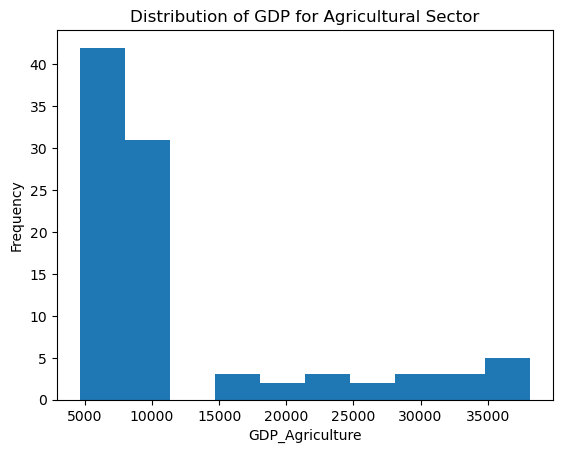

Skewness: 1.6487034495124124
Kurtosis: 1.356559455537215


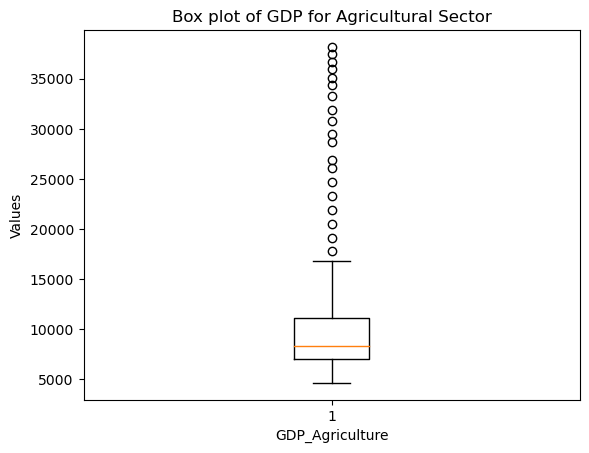

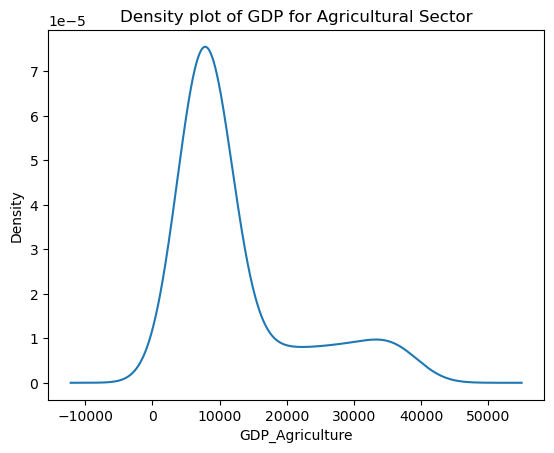

In [71]:
# Histogram
plt.hist(agric_df['GDP_Agriculture'], bins=10)
plt.xlabel('GDP_Agriculture')
plt.ylabel('Frequency')
plt.title('Distribution of GDP for Agricultural Sector')
plt.show()

# Calculate skewness and kurtosis
skewness = skew(agric_df['GDP_Agriculture'])
kurt = kurtosis(agric_df['GDP_Agriculture'])

# Print the results
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


# Box Plot
plt.boxplot(agric_df['GDP_Agriculture'])
plt.xlabel('GDP_Agriculture')
plt.ylabel('Values')
plt.title('Box plot of GDP for Agricultural Sector')
plt.show()

# Density Plot
agric_df['GDP_Agriculture'].plot.kde()
plt.xlabel('GDP_Agriculture')
plt.ylabel('Density')
plt.title('Density plot of GDP for Agricultural Sector')
plt.show()


In [56]:
# Filter the dataframe for annual data
annual_df = agric_df[agric_df['Period'] == 'Annual']

# Line Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['GDP_Agriculture'], mode='lines', name='GDP_Agriculture'))
fig.update_layout(title='Agricultural contribution to GDP over Time (Annual)', xaxis_title='Index', yaxis_title='GDP_Agriculture')
fig.show()

# Bar Chart
fig = go.Figure()
fig.add_trace(go.Bar(x=annual_df.index, y=annual_df['Agriculture'], name='Agriculture'))
fig.update_layout(title='Agricultural contribution to GDP over Time (Annual)', xaxis_title='Index', yaxis_title='Agriculture')
fig.show()

In [49]:
# Line Plot for GDP of different sectors within Agriculture
sectors = ['CropProduction', 'Livestock', 'Forestry', 'Fishing']
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df[sector], mode='lines', name=sector))
fig.update_layout(title='GDP Trend over Time for Different Sectors within Agriculture (Annual)', xaxis_title='Index', yaxis_title='GDP')
fig.show()

# Bar Chart for GDP of different sectors within Agriculture
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Bar(x=annual_df.index, y=annual_df[sector], name=sector))
fig.update_layout(title='GDP of Different Sectors within Agriculture over Time (Annual)', xaxis_title='Index', yaxis_title='GDP')
fig.show()


In [51]:
# Line Plot for each agricultural sector
fig = go.Figure()
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['CropProductionGrowth %'], mode='lines', name='Crop Production'))
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['LivestockGrowth %'], mode='lines', name='Livestock'))
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['ForestryGrowth %'], mode='lines', name='Forestry'))
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['FishingGrowth %'], mode='lines', name='Fishing'))
fig.update_layout(title='Growth in Agricultural Sectors over Time (Annual)',
                  xaxis_title='Index', yaxis_title='Growth Rate (%)')
fig.show()

# Line Plot for overall agricultural sector
fig = go.Figure()
fig.add_trace(go.Scatter(x=annual_df.index, y=annual_df['AgricGrowth (%)'], mode='lines', name='Agriculture'))
fig.update_layout(title='Growth in Agriculture Sector over Time (Annual)',
                  xaxis_title='Index', yaxis_title='Growth Rate (%)')
fig.show()

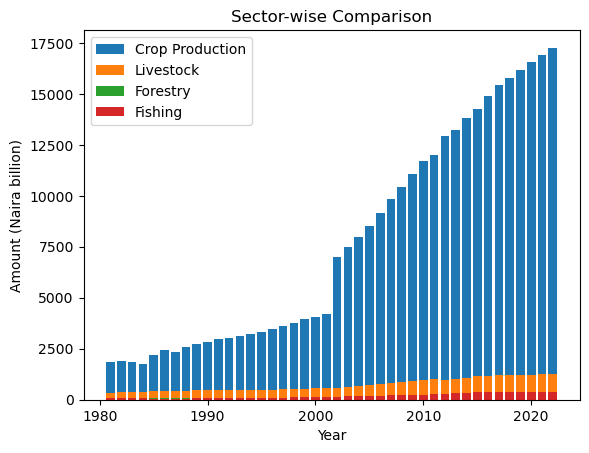

In [58]:
plt.bar(agric_df.index, agric_df['CropProduction'], label='Crop Production')
plt.bar(agric_df.index, agric_df['Livestock'], label='Livestock')
plt.bar(agric_df.index, agric_df['Forestry'], label='Forestry')
plt.bar(agric_df.index, agric_df['Fishing'], label='Fishing')

plt.xlabel('Year')
plt.ylabel('Amount (Naira billion)')
plt.title('Sector-wise Comparison')
plt.legend()
plt.show()

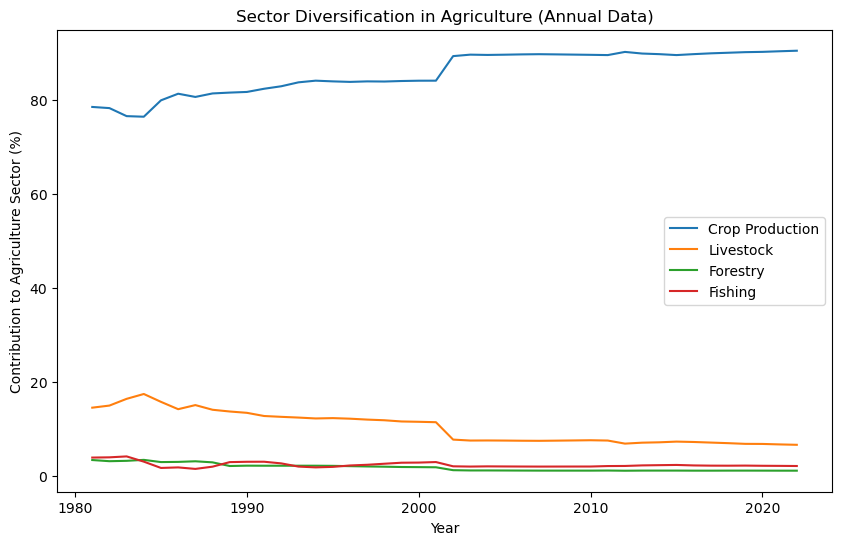

In [64]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only annual data
annual_data = agric_df[agric_df['Period'] == 'Annual']

# Calculate the percentage contribution of each sector
total_agriculture = annual_data['CropProduction'] + annual_data['Livestock'] + annual_data['Forestry'] + annual_data['Fishing']
crop_contribution = (annual_data['CropProduction'] / total_agriculture) * 100
livestock_contribution = (annual_data['Livestock'] / total_agriculture) * 100
forestry_contribution = (annual_data['Forestry'] / total_agriculture) * 100
fishing_contribution = (annual_data['Fishing'] / total_agriculture) * 100

# Plot the sector diversification
plt.figure(figsize=(10, 6))
plt.plot(annual_data.index, crop_contribution, label='Crop Production')
plt.plot(annual_data.index, livestock_contribution, label='Livestock')
plt.plot(annual_data.index, forestry_contribution, label='Forestry')
plt.plot(annual_data.index, fishing_contribution, label='Fishing')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Contribution to Agriculture Sector (%)')
plt.title('Sector Diversification in Agriculture (Annual Data)')
plt.legend()

# Display the plot
plt.show()

In [69]:
import scipy.stats as stats

# Define the earlier years and recent years for each sector
earlier_crop_production = agric_df.loc['1981':'2000', 'CropProduction']
recent_crop_production = agric_df.loc['2001':'2022', 'CropProduction']

earlier_livestock = agric_df.loc['1981':'2000', 'Livestock']
recent_livestock = agric_df.loc['2001':'2022', 'Livestock']

earlier_forestry = agric_df.loc['1981':'2000', 'Forestry']
recent_forestry = agric_df.loc['2001':'2022', 'Forestry']

earlier_fishing = agric_df.loc['1981':'2000', 'Fishing']
recent_fishing = agric_df.loc['2001':'2022', 'Fishing']

# Perform t-tests for each sector
crop_production_t_statistic, crop_production_p_value = stats.ttest_ind(earlier_crop_production, recent_crop_production)
livestock_t_statistic, livestock_p_value = stats.ttest_ind(earlier_livestock, recent_livestock)
forestry_t_statistic, forestry_p_value = stats.ttest_ind(earlier_forestry, recent_forestry)
fishing_t_statistic, fishing_p_value = stats.ttest_ind(earlier_fishing, recent_fishing)

# Print the results for each sector
print('Crop Production:')
print('T-Statistic:', crop_production_t_statistic)
print('P-Value:', crop_production_p_value)
print()

print('Livestock:')
print('T-Statistic:', livestock_t_statistic)
print('P-Value:', livestock_p_value)
print()

print('Forestry:')
print('T-Statistic:', forestry_t_statistic)
print('P-Value:', forestry_p_value)
print()

print('Fishing:')
print('T-Statistic:', fishing_t_statistic)
print('P-Value:', fishing_p_value)
print()


Crop Production:
T-Statistic: -3.351191036525349
P-Value: 0.0011686413823759822

Livestock:
T-Statistic: -0.4140168504888225
P-Value: 0.6798253975169632

Forestry:
T-Statistic: 0.663444835278748
P-Value: 0.5087047564451133

Fishing:
T-Statistic: -2.4858659334850075
P-Value: 0.014728955049746294



# Agriculture and Fisheries Data Analysis

The dataset provides insights into the crop production, livestock, forestry, and fishing sectors over a period of several decades. The following analysis highlights the key trends and statistical observations:

Crop Production:

The annual crop production revenue has shown significant growth over the years, reaching a peak of 17,260.75 billion naira in 2022.
The average crop production value is 5,473.69 billion naira, with a standard deviation of 4,161.20 billion naira.
The crop production data exhibits positive skewness (1.65), indicating a tail towards higher values, and a moderate kurtosis (1.36), suggesting a relatively normal distribution.
Livestock:

The livestock sector has maintained a relatively stable revenue, with an average value of 479.88 billion naira.
The standard deviation is 302.22 billion naira, indicating some variability in the sector's performance.
The data shows a negative skewness (-0.41) and a slightly platykurtic distribution (kurtosis = 0.68).
Forestry:

The forestry sector revenue has fluctuated over time, with a minimum value of 30.16 billion naira and a maximum value of 196.36 billion naira.
The average forestry revenue is 73.89 billion naira, with a standard deviation of 45.07 billion naira.
The data follows a positively skewed distribution (skewness = 0.66) and is close to a normal distribution (kurtosis = 0.51).
Fishing:

The fishing industry has shown resilience and adaptability, with revenue ranging from 40.65 billion naira to 386.24 billion naira.
The average fishing revenue is 130.50 billion naira, with a standard deviation of 93.41 billion naira.
The fishing data exhibits a positive skewness (2.48) and a slightly leptokurtic distribution (kurtosis = 3.51).
Sector Comparison and Statistical Tests:

Comparing the earlier years (1981-2000) to the recent years (2001-2022) in each sector, the following results were obtained:

Crop Production: The t-test indicates a significant difference in crop production revenue between the earlier and recent years (t = -3.35, p < 0.01), suggesting a noticeable change in performance.
Livestock: The t-test results indicate no significant difference in livestock revenue between the earlier and recent years (t = -0.41, p > 0.05), suggesting relatively consistent performance.
Forestry: The t-test shows no significant difference in forestry revenue between the earlier and recent years (t = 0.66, p > 0.05), suggesting stability in the sector.
Fishing: The t-test reveals a significant difference in fishing revenue between the earlier and recent years (t = -2.49, p < 0.05), indicating a notable change in performance.
Conclusion:

The agriculture and fisheries sectors have experienced diverse trends and performance over the years. Crop production has shown significant growth, while livestock and forestry have remained relatively stable. The fishing industry has demonstrated adaptability but also experienced fluctuations. These findings indicate the dynamic nature of these sectors, influenced by various factors such as market demands, technological advancements, and environmental conditions.

It's important to note that these statistics represent revenue figures